In [93]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('playstore-analysis.csv')

In [5]:
df.shape

(10841, 13)

In [6]:
df.size

140933

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [9]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               460
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### a. Drop records where rating is missing since rating is our target/study variable

In [12]:
df.dropna(subset=['Rating'],axis=0,inplace=True)

In [13]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column.

 ##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### i . Yes all 3 records having same problem

### ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [15]:
df.drop([10472],inplace=True)

In [16]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### iii. Replace remaining missing values with the mode

In [17]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)

In [18]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


 ##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### c. Current ver – replace with most common value

In [19]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [91]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Data clean up – correcting the data types
### a. Which all variables need to be brought to numeric types?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


### Reviews,Installs and price need to be brought to numeric type

### b. Price variable – remove $ sign and convert to float

In [21]:
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
        

In [22]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [23]:
df['Installs']=df['Installs'].replace({',': '', '\+' : ''},regex=True).astype(int)

In [24]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

### d. Convert all other identified columns to numeric

In [25]:
df['Reviews']=df['Reviews'].astype(float)

In [26]:
df['Reviews'].head()

0       159.0
1       967.0
2     87510.0
3    215644.0
4       967.0
Name: Reviews, dtype: float64

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Sanity checks – check for the following and handle accordingly
### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df[(df['Rating'] <= 1) & (df['Rating'] >=5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### i. Are there any such records? Drop if so.

### No.. There are no such Records Found

### b. Reviews should not be more than installs as only those who installed can review the app.

In [29]:
df[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


### i. Are there any such records? Drop if so.

### yess... there are 7 records found 

In [30]:
a = df[df['Reviews']>df['Installs']].index
df.drop(labels=a,inplace=True)

In [31]:
 df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


  ##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 4. Identify and handle outliers –
### a. Price column
### i. Make suitable plot to identify outliers in price

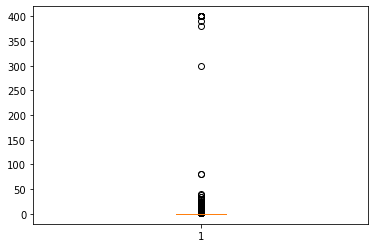

In [32]:
plt.boxplot(df['Price'],vert=True,patch_artist=True)
plt.show()

### ii. Do you expect apps on the play store to cost $200? Check out these cases

In [33]:
df[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


### iii. After dropping the useless records, make the suitable plot again to identify outliers

In [34]:
a = df[df['Price']> 200].index

In [35]:
df.drop(labels=a,inplace=True)

In [36]:
df[df['Price']> 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


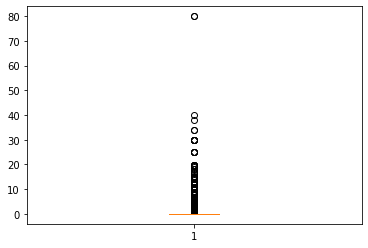

In [37]:
plt.boxplot(df['Price'])
plt.show()

### iv. Limit data to records with price < $30


In [38]:
a = df[df['Price']<30]

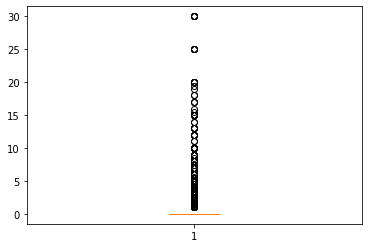

In [39]:
plt.boxplot(a['Price'])
plt.show()

### b. Reviews column

### i. Make suitable plot

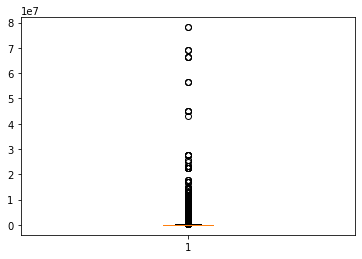

In [40]:
plt.boxplot(df['Reviews'])
plt.show()

### ii. Limit data to apps with < 1 Million reviews

In [41]:
RW=df[df['Reviews'] < 1000000]

<AxesSubplot:xlabel='Reviews', ylabel='Count'>

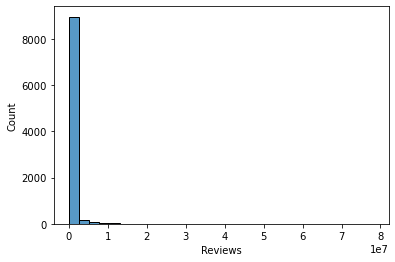

In [42]:
sns.histplot(df['Reviews'],bins=30,kde=False)

 ## c. Installs
### i. What is the 95th percentile of the installs?

In [43]:
pr = df.Installs.quantile(0.95)

In [44]:
pr 

100000000.0

In [45]:
#95th percentile of the installs is 100000000.0

### ii. Drop records having a value more than the 95th percentile

In [46]:
d =df[df['Installs'] > pr].index

In [47]:
df.drop(labels=d,inplace=True)

In [48]:
d.shape

(130,)

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lowervalues?
### a. How do you explain this?
### b. What is the implication of this on your analysis?

In [49]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

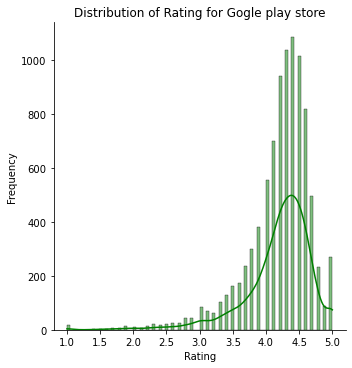

In [50]:
sns.displot(df['Rating'],kde='line',color='green')
plt.title('Distribution of Rating for Gogle play store')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [51]:
sk=df['Rating'].skew()
m = df['Rating'].mean()
md = df['Rating'].median()
print('The skewness of Distribution is' ,sk)
print('--------------------------------------')
print(f'Mean : {m} and Median : {md} ')

The skewness of Distribution is -1.8416513505231236
--------------------------------------
Mean : 4.190036900369009 and Median : 4.3 


""" Most of the people tend to give rating around 4.0 to 4.7 . 
very few people give more than 4.7 and lots people give 1.0 to 3.9""" 

"""This distribution has negative skew because there's a long tail of values on the negative side of the peak.
    You would otherwise say this data is "skewed to the left"""

""" Distribution is nagetive skewed becuase median is greaterthan mean"""

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 6. What are the top Content Rating values?
### a. Are there any values with very few records?

 Top content rating values are : Everyone,Teen,Mature 17

In [53]:
df['Content Rating'].value_counts()

Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

### yesss.... there are values that have few records 

Adult only 18+ and Unrated 

### b. If yes, drop those as they won’t help in the analysis

In [55]:
a=df[df['Content Rating'] == 'Adults only 18+' ].index

In [56]:
df.drop(labels=a,inplace=True)

In [57]:
df[df['Content Rating'] == 'Adults only 18+' ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [58]:
b=df[df['Content Rating'] == 'Unrated' ].index

In [59]:
df.drop(labels=b,inplace=True)

In [60]:
df[df['Content Rating'] == 'Unrated' ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


 ##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 7. Effect of size on rating
### a. Make a joinplot to understand the effect of size on rating

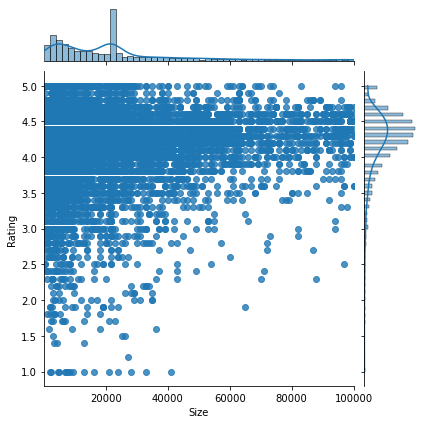

In [61]:
sns.jointplot(x='Size',y='Rating',data=df,kind='reg')
plt.show()

### b. Do you see any patterns?

yesss..... pattern is between size and Rating. Thair is correlation between size and Rating

### c. How do you explain the pattern?

In this pattern we can see if rating is higher than size of app is large. if rating is between 1.0 to 2.5 than size of 
app is smaller.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 8. Effect of price on rating
### a. Make a jointplot (with regression line)

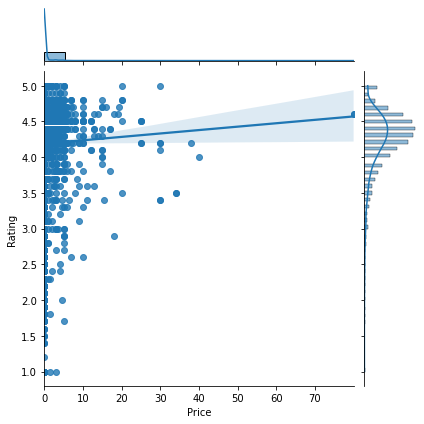

In [62]:
sns.jointplot(x='Price' , y='Rating',data=df,kind='reg')
plt.show()

### b. What pattern do you see?

we can see pattern between Price and Rating. Thare is positive correlation pattern.


### c. How do you explain the pattern?

when price is low rating is high. when price is increased rating is becomes constant 4.


### d. Replot the data, this time with only records with price > 0

In [63]:
a=df[df['Price'] > 0]

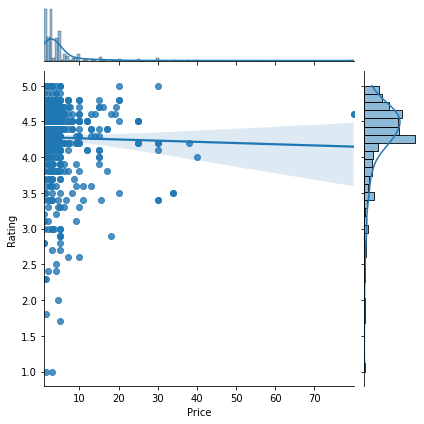

In [64]:
sns.jointplot(x='Price',y='Rating' ,data=a,kind='reg')
plt.show()

### e. Does the pattern change?

yesss.... if we only consider records with price > 0 then the pattern becomes negative correlation between Rating and Price

### f. What is your overall inference on the effect of price on the rating

 in overall Prices doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4



##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 9. Look at all the numeric interactions together –
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

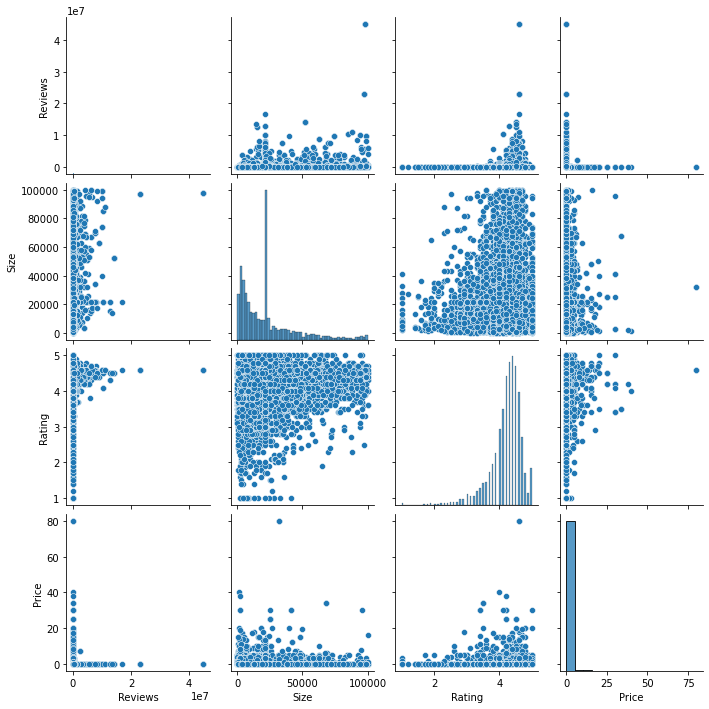

In [65]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'])

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 10. Rating vs. content rating
### a. Make a bar plot displaying the rating for each content rating

In [66]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

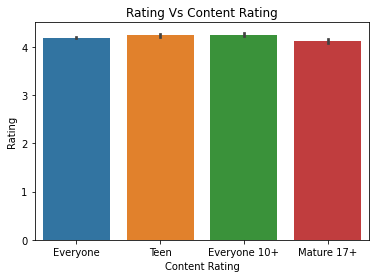

In [67]:
sns.barplot(x='Content Rating',y='Rating',data=df)
plt.title('Rating Vs Content Rating')
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?

we use median metrice because we have outlier in Rating

### c. Choose the right metric and plot

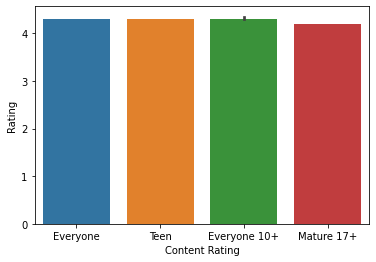

In [74]:
sns.barplot(x='Content Rating',y='Rating',data=df,estimator=np.median)
plt.show()

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 11. Content rating vs. size vs. rating – 3 variables at a time

### a. Create 5 buckets (20% records in each) based on Size

In [76]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins,labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.149182,4.247561,4.015183,4.190289
20k-40k,4.226711,4.194413,4.193370,4.237500
40k-60k,4.192857,4.265957,4.202222,4.270896
60k-80k,4.265368,4.356818,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [77]:
a=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
a

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


### c. Make a heatmap of this
#### i. Annotated
#### ii. Greens color map

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

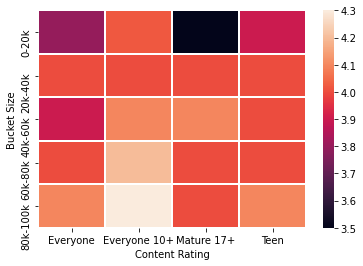

In [78]:
sns.heatmap(a,linewidths=1)

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

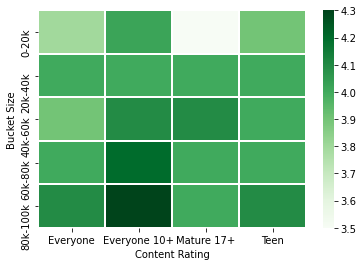

In [81]:
sns.heatmap(a,linewidths=1,cmap='Greens')

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on Analysis, lighter apps are preferred some of the categories and  heavier apps are preferred to all categories